In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

Read and Load the Dataset

In [2]:
data=pd.read_csv("Tweet_NFT.csv",names=["id","text","datetime","intent"],header=0)

Exploratory Data Analysis 

In [3]:
data.head()

,id,text,datetime,intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [4]:
data["text"]

0         @crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...
1         Need Sick Character artâ“#art #artist #Artist...
2         @The_Hulk_NFT @INagotchiNFT @Tesla @killabears...
3         @CryptoBatzNFT @DarekBTW The first project in ...
4         @sashadysonn The first project in crypto with ...
                                ...                        
127448    @Jason My company Universe is solving this, an...
127449            @BosoTokyo Many will get rekt in this NFT
127450    @leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...
127451               @1kz3ro @UNLEASHED_NFT I love this job
127452    @Shill_Ronin @UNLEASHED_NFT my proof https://t...
Name: text, Length: 127453, dtype: object

In [5]:
data.shape

(127453, 4)

In [6]:
data.isnull().sum()

id              0
text            0
datetime        0
intent      31089
dtype: int64

In [7]:
data["intent"].value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: intent, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        127453 non-null  int64 
 1   text      127453 non-null  object
 2   datetime  127453 non-null  object
 3   intent    96364 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


Checking the uniqueness of id

In [9]:
data["id"].unique().shape

(127453,)

# Data Visualization

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Community'),
  Text(1, 0, 'Giveaway'),
  Text(2, 0, 'Appreciation'),
  Text(3, 0, 'Presale'),
  Text(4, 0, 'Whitelist'),
  Text(5, 0, 'pinksale'),
  Text(6, 0, 'Done'),
  Text(7, 0, 'Interested'),
  Text(8, 0, 'Launching Soon')])

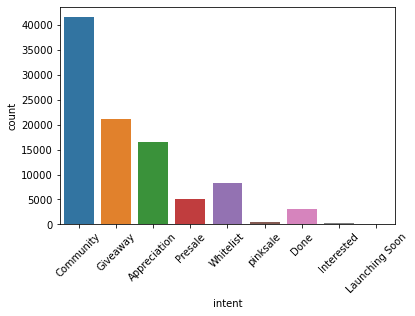

In [10]:
#visualize the intent 

sns.countplot(x='intent', data=data)
plt.xticks(rotation=45)


Convert categorical column to codes

In [11]:
data.intent=pd.Categorical(data.intent)
data["intent"]=data.intent.cat.codes

In [12]:
data

,id,text,datetime,intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,1
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,3
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,0
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,1
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,1
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,-1
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,-1
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,-1
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,-1


In [13]:
#codes assigned
data["intent"].value_counts()

 1    41510
-1    31089
 3    21041
 0    16451
 7     8320
 6     5107
 2     3049
 8      477
 4      276
 5      133
Name: intent, dtype: int64

# Data Preprocessing 

In [14]:
data['text']=data['text'].str.lower()
data['text'].tail()

127448    @jason my company universe is solving this, an...
127449            @bosotokyo many will get rekt in this nft
127450    @leeneedham81 @kibainuworld @hodl_official @ko...
127451               @1kz3ro @unleashed_nft i love this job
127452    @shill_ronin @unleashed_nft my proof https://t...
Name: text, dtype: object

In [15]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

Cleaning and removing the above stop words list from the tweet text

In [16]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0    @crypto_brody @ecology1990 @moonrunnersnft @it...
1    need sick character artâ“#art #artist #artist...
2    @the_hulk_nft @inagotchinft @tesla @killabears...
3    @cryptobatznft @darekbtw first project crypto ...
4    @sashadysonn first project crypto move earn #a...
Name: text, dtype: object

Cleaning and removing punctuations

In [17]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].head()

0    cryptobrody ecology1990 moonrunnersnft itsukin...
1    need sick character artâ“art artist artists a...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw first project crypto mo...
4    sashadysonn first project crypto move earn ast...
Name: text, dtype: object

Cleaning and removing repeating characters

In [18]:
import re

In [19]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].head()

0    cryptobrody ecolog1990 moonrunnersnft itsukinf...
1    need sick character artâ“art artist artists a...
2    thehulknft inagotchinft tesla killabearsnft el...
3    cryptobatznft darekbtw first project crypto mo...
4    sashadysonn first project crypto move earn ast...
Name: text, dtype: object

 Cleaning and removing URL’s

In [20]:
def cleaning_URLs(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

127448    jason company universe solving this weve got c...
127449                          bosotokyo many get rekt nft
127450    leeneedham1 kibainuworld hodlofficial koacomba...
127451                         1kz3ro unleashednft love job
127452     shillronin unleashednft proof httpstco44di9p2gz7
Name: text, dtype: object

Cleaning and removing Numeric numbers

In [21]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

127448    jason company universe solving this weve got c...
127449                          bosotokyo many get rekt nft
127450    leeneedham kibainuworld hodlofficial koacombat...
127451                           kzro unleashednft love job
127452          shillronin unleashednft proof httpstcodipgz
Name: text, dtype: object

Getting tokenization of tweet text

In [22]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+|$[0-9]+|\S+')
data['text'] = data['text'].apply(tokenizer.tokenize)
data['text'].head()

0    [cryptobrody, ecolog, moonrunnersnft, itsukinf...
1    [need, sick, character, artâ, “art, artist, a...
2    [thehulknft, inagotchinft, tesla, killabearsnf...
3    [cryptobatznft, darekbtw, first, project, cryp...
4    [sashadysonn, first, project, crypto, move, ea...
Name: text, dtype: object

Applying Stemming

In [23]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [cryptobrody, ecolog, moonrunnersnft, itsukinf...
1    [need, sick, character, artâ, “art, artist, a...
2    [thehulknft, inagotchinft, tesla, killabearsnf...
3    [cryptobatznft, darekbtw, first, project, cryp...
4    [sashadysonn, first, project, crypto, move, ea...
Name: text, dtype: object

In [24]:
data.head()

,id,text,datetime,intent
0,1212762,"[cryptobrody, ecolog, moonrunnersnft, itsukinf...",2022-08-06T16:56:36.000Z,1
1,1212763,"[need, sick, character, artâ, “art, artist, a...",2022-08-06T16:56:36.000Z,3
2,1212765,"[thehulknft, inagotchinft, tesla, killabearsnf...",2022-08-06T16:56:35.000Z,0
3,1212766,"[cryptobatznft, darekbtw, first, project, cryp...",2022-08-06T16:56:35.000Z,1
4,1212767,"[sashadysonn, first, project, crypto, move, ea...",2022-08-06T16:56:34.000Z,1


Splitting the missing intent to test & remaining to train

In [25]:
testdf = data[data['intent'] == -1]
traindf = data[data['intent'] != -1]

In [26]:
traindf 

,id,text,datetime,intent
0,1212762,"[cryptobrody, ecolog, moonrunnersnft, itsukinf...",2022-08-06T16:56:36.000Z,1
1,1212763,"[need, sick, character, artâ, “art, artist, a...",2022-08-06T16:56:36.000Z,3
2,1212765,"[thehulknft, inagotchinft, tesla, killabearsnf...",2022-08-06T16:56:35.000Z,0
3,1212766,"[cryptobatznft, darekbtw, first, project, cryp...",2022-08-06T16:56:35.000Z,1
4,1212767,"[sashadysonn, first, project, crypto, move, ea...",2022-08-06T16:56:34.000Z,1
...,...,...,...,...
96359,1424490,"[nftcryptogang, liuyan, xfedaeeeaadaecbfc, tha...",2022-08-11T23:11:58.000Z,0
96360,1424491,"[registered, win, cryptopunksnfts, blokpax, le...",2022-08-11T23:11:58.000Z,6
96361,1424494,"[solsniffer, dyor, nft, collection, dictators,...",2022-08-11T23:11:58.000Z,0
96362,1424497,"[nft, nftcommmunity, deltaflare, join, discord...",2022-08-11T23:11:56.000Z,1


Assigning Dependent and independent variable

In [27]:
X=traindf["text"]

In [28]:
Y=traindf["intent"]

Splitting the traindf to train and test dataset 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.05, random_state =26105111)

In [30]:
X_t=X_train.astype(str)

In [31]:
X_s=X_test.astype(str)

Transforming Dataset using TF-IDF Vectorizer

In [67]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_t)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
import warnings
warnings.filterwarnings("ignore")


No. of feature_words:  495733


In [35]:
X_train = vectoriser.transform(X_t)
X_test  = vectoriser.transform(X_s)

# Model Building

Bernoulli Naive Bayes,SVM (Support Vector Machine),Logistic Regression

MODEL-1 (Logistic Regression)

In [36]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [37]:
y_pred1= LRmodel.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred1)

0.9692882340734592

In [39]:
confusion_matrix(y_test, y_pred1)

array([[ 810,    8,    0,    7,    0,    0,    1,    3,    0],
       [   6, 1990,    0,    3,    0,    0,    0,    1,    0],
       [   3,    1,  146,    1,    0,    0,    0,    1,    0],
       [  12,   21,    0, 1055,    1,    0,    0,    3,    0],
       [   2,    3,    0,    1,   12,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    9,    0,    0,    0],
       [   1,    4,    0,    2,    0,    0,  263,    1,    0],
       [  16,   35,    0,    7,    0,    0,    2,  371,    1],
       [   0,    0,    0,    1,    0,    0,    0,    0,   15]],
      dtype=int64)

In [40]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       829
           1       0.97      0.99      0.98      2000
           2       1.00      0.96      0.98       152
           3       0.98      0.97      0.97      1092
           4       0.92      0.67      0.77        18
           5       1.00      1.00      1.00         9
           6       0.99      0.97      0.98       271
           7       0.98      0.86      0.91       432
           8       0.94      0.94      0.94        16

    accuracy                           0.97      4819
   macro avg       0.97      0.93      0.94      4819
weighted avg       0.97      0.97      0.97      4819



MODEL-2(Bernoulli Naive Bayes)

In [41]:
BNBmodel = BernoulliNB()

In [42]:
BNBmodel.fit(X_train, y_train)

BernoulliNB()

In [43]:
y_pred2 = BNBmodel.predict(X_test)


In [44]:
accuracy_score(y_test, y_pred2)

0.8279726084249844

In [45]:
confusion_matrix(y_test, y_pred2)

array([[ 618,  197,    0,   14,    0,    0,    0,    0,    0],
       [  13, 1965,    0,   21,    0,    0,    0,    1,    0],
       [  57,   92,    3,    0,    0,    0,    0,    0,    0],
       [  31,   60,    0, 1001,    0,    0,    0,    0,    0],
       [   5,   12,    0,    1,    0,    0,    0,    0,    0],
       [   1,    0,    0,    7,    0,    0,    0,    1,    0],
       [   5,  126,    0,   11,    0,    0,  129,    0,    0],
       [  28,   91,    0,   39,    0,    0,    0,  274,    0],
       [   2,    1,    0,    6,    0,    0,    0,    7,    0]],
      dtype=int64)

In [47]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       829
           1       0.77      0.98      0.86      2000
           2       1.00      0.02      0.04       152
           3       0.91      0.92      0.91      1092
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         9
           6       1.00      0.48      0.65       271
           7       0.97      0.63      0.77       432
           8       0.00      0.00      0.00        16

    accuracy                           0.83      4819
   macro avg       0.61      0.42      0.45      4819
weighted avg       0.84      0.83      0.81      4819



MODEL-3(SVM (Support Vector Machine))

In [48]:
SVCmodel = LinearSVC()

In [49]:
SVCmodel.fit(X_train, y_train)

LinearSVC()

In [50]:
y_pred3 = SVCmodel.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred3)

0.9786262710105831

In [52]:
y_pred3

array([2, 0, 1, ..., 1, 1, 1], dtype=int8)

In [53]:
print(classification_report(y_test, y_pred3))
import warnings
warnings.filterwarnings("ignore")

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       829
           1       0.98      1.00      0.99      2000
           2       1.00      0.97      0.99       152
           3       0.99      0.97      0.98      1092
           4       0.94      0.94      0.94        18
           5       1.00      1.00      1.00         9
           6       0.99      0.99      0.99       271
           7       0.98      0.89      0.93       432
           8       0.94      1.00      0.97        16

    accuracy                           0.98      4819
   macro avg       0.98      0.97      0.97      4819
weighted avg       0.98      0.98      0.98      4819



1)Accuracy of SVM model is higher than other two model 
2)Model-3(SVM (Support Vector Machine)) is used to predict the values of New data set

In [54]:
X_n=testdf["text"].astype(str)

In [55]:
X_new = vectoriser.transform(X_n)

In [56]:
y_new = SVCmodel.predict(X_new)

In [57]:
y_new

array([7, 3, 7, ..., 7, 0, 2], dtype=int8)

Missing values of intent is added to test dataframe

In [58]:
test=testdf.drop(["intent"],axis=1)

In [59]:
test['intent'] = y_new


In [60]:
test

,id,text,datetime,intent
96364,1212764,"[off, ðÿ, §™â€â™‚ï¸, wizardia, nfts, its, pe...",2022-08-06T16:56:35.000Z,7
96365,1212770,"[asksabir, daolm, dont, miss, chance, win, nft...",2022-08-06T16:56:33.000Z,3
96366,1212773,"[zesty, faucet, bitcoiner, making, tweet, clai...",2022-08-06T16:56:33.000Z,7
96367,1212804,"[off, ðÿ, §™â€â™‚ï¸, wizardia, nfts, its, pe...",2022-08-06T16:56:23.000Z,7
96368,1212776,"[kavaboynft, tanyad, message, me, letâ, €™s, t...",2022-08-06T16:56:32.000Z,0
...,...,...,...,...
127448,1278721,"[jason, company, universe, solving, this, weve...",2022-08-08T03:32:01.000Z,1
127449,1278723,"[bosotokyo, many, get, rekt, nft]",2022-08-08T03:32:00.000Z,0
127450,1278724,"[leeneedham, kibainuworld, hodlofficial, koaco...",2022-08-08T03:32:00.000Z,7
127451,1278725,"[kzro, unleashednft, love, job]",2022-08-08T03:31:59.000Z,0


In [61]:
#all the data are concated to a single dataframe
data2=pd.concat([traindf,test])
data2

,id,text,datetime,intent
0,1212762,"[cryptobrody, ecolog, moonrunnersnft, itsukinf...",2022-08-06T16:56:36.000Z,1
1,1212763,"[need, sick, character, artâ, “art, artist, a...",2022-08-06T16:56:36.000Z,3
2,1212765,"[thehulknft, inagotchinft, tesla, killabearsnf...",2022-08-06T16:56:35.000Z,0
3,1212766,"[cryptobatznft, darekbtw, first, project, cryp...",2022-08-06T16:56:35.000Z,1
4,1212767,"[sashadysonn, first, project, crypto, move, ea...",2022-08-06T16:56:34.000Z,1
...,...,...,...,...
127448,1278721,"[jason, company, universe, solving, this, weve...",2022-08-08T03:32:01.000Z,1
127449,1278723,"[bosotokyo, many, get, rekt, nft]",2022-08-08T03:32:00.000Z,0
127450,1278724,"[leeneedham, kibainuworld, hodlofficial, koaco...",2022-08-08T03:32:00.000Z,7
127451,1278725,"[kzro, unleashednft, love, job]",2022-08-08T03:31:59.000Z,0


In [62]:
#convert all the codes to category names
codes=[0,1,2,3,4,5,6,7,8]
values=["Appreciation","Community","Done","Giveaway","Interested","Launching Soon","Presale","Whitelist","pinksale"]

In [63]:
final=data2.replace(to_replace=codes,value=values)
final

,id,text,datetime,intent
0,1212762,"[cryptobrody, ecolog, moonrunnersnft, itsukinf...",2022-08-06T16:56:36.000Z,Community
1,1212763,"[need, sick, character, artâ, “art, artist, a...",2022-08-06T16:56:36.000Z,Giveaway
2,1212765,"[thehulknft, inagotchinft, tesla, killabearsnf...",2022-08-06T16:56:35.000Z,Appreciation
3,1212766,"[cryptobatznft, darekbtw, first, project, cryp...",2022-08-06T16:56:35.000Z,Community
4,1212767,"[sashadysonn, first, project, crypto, move, ea...",2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721,"[jason, company, universe, solving, this, weve...",2022-08-08T03:32:01.000Z,Community
127449,1278723,"[bosotokyo, many, get, rekt, nft]",2022-08-08T03:32:00.000Z,Appreciation
127450,1278724,"[leeneedham, kibainuworld, hodlofficial, koaco...",2022-08-08T03:32:00.000Z,Whitelist
127451,1278725,"[kzro, unleashednft, love, job]",2022-08-08T03:31:59.000Z,Appreciation


In [64]:
#checking null values 
final.isnull().sum()

id          0
text        0
datetime    0
intent      0
dtype: int64

In [65]:
#missing intent is diplayed
missing_values=final.iloc[96364:]
missing_values

,id,text,datetime,intent
96364,1212764,"[off, ðÿ, §™â€â™‚ï¸, wizardia, nfts, its, pe...",2022-08-06T16:56:35.000Z,Whitelist
96365,1212770,"[asksabir, daolm, dont, miss, chance, win, nft...",2022-08-06T16:56:33.000Z,Giveaway
96366,1212773,"[zesty, faucet, bitcoiner, making, tweet, clai...",2022-08-06T16:56:33.000Z,Whitelist
96367,1212804,"[off, ðÿ, §™â€â™‚ï¸, wizardia, nfts, its, pe...",2022-08-06T16:56:23.000Z,Whitelist
96368,1212776,"[kavaboynft, tanyad, message, me, letâ, €™s, t...",2022-08-06T16:56:32.000Z,Appreciation
...,...,...,...,...
127448,1278721,"[jason, company, universe, solving, this, weve...",2022-08-08T03:32:01.000Z,Community
127449,1278723,"[bosotokyo, many, get, rekt, nft]",2022-08-08T03:32:00.000Z,Appreciation
127450,1278724,"[leeneedham, kibainuworld, hodlofficial, koaco...",2022-08-08T03:32:00.000Z,Whitelist
127451,1278725,"[kzro, unleashednft, love, job]",2022-08-08T03:31:59.000Z,Appreciation
